In [89]:
import csv
import numpy as np
import os
import random
import cv2
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, mean_shift

In [90]:
main_direct = '../resources/micro_proyecto1_data'

In [91]:
def load_images(main_direct, file_names, flatten=True, normalize=True):
    
    image_list = list()
    for file in file_names:
        img = cv2.imread(os.path.join(main_direct, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if flatten:
            img = img.reshape((-1, 3))
        if normalize:
            img = img / 255.0
        image_list.append(img)
    return image_list

In [92]:
img_files = os.listdir(main_direct)
#imagen que se quiere probar 0 - 11
imagen_prueba = 8
#numero de clusters que se quieren
clusters = 10
img_files

['ad-reinhardt_blue-painting-1953.jpg',
 'adolf-fleischmann_hommage-delaunay-et-gleizes-1938.jpg',
 'albert-gleizes_la-chasse-1911.jpg',
 'albert-gleizes_portrait-de-jacques-nayral-1911.jpg',
 'aldemir-martins_yellow-cat-2001.jpg',
 'alfred-manessier_soir-e-d-octobre-1946.jpg',
 'alma-woodsey-thomas_starry-night-and-the-astronauts-1972.jpg',
 'andre-bauchant_cinq-personnages-dans-un-paysage-de-montagne-1953.jpg',
 'arman-manookian_ala-wai-honolulu-1928.jpg',
 'arman-manookian_shaman-1930.jpg',
 'barnett-newman_vir-heroicus-sublimis-1951.jpg',
 'claude-viallat_untitled-no-40-1996.jpg']

In [93]:
img_original = load_images(main_direct, img_files, flatten=False, normalize=False)
img_original[imagen_prueba]

array([[[215, 203, 207],
        [210, 198, 202],
        [211, 199, 201],
        ...,
        [208,  83,  61],
        [208,  86,  63],
        [209,  89,  65]],

       [[231, 212, 208],
        [228, 210, 206],
        [232, 213, 209],
        ...,
        [205,  83,  60],
        [210,  90,  66],
        [212,  92,  68]],

       [[237, 206, 186],
        [232, 204, 183],
        [230, 199, 179],
        ...,
        [199,  77,  53],
        [207,  87,  62],
        [214,  95,  71]],

       ...,

       [[ 47,  34,  25],
        [ 45,  27,  13],
        [ 60,  27,   8],
        ...,
        [179, 179, 155],
        [182, 182, 156],
        [182, 180, 155]],

       [[ 46,  36,  26],
        [ 48,  30,  16],
        [ 64,  31,  12],
        ...,
        [178, 176, 151],
        [179, 178, 150],
        [180, 176, 149]],

       [[ 46,  36,  26],
        [ 50,  32,  18],
        [ 66,  35,  15],
        ...,
        [183, 179, 154],
        [184, 180, 153],
        [181, 177, 148]]

In [94]:
img_list = load_images(main_direct, img_files, flatten=True, normalize=True)
img_list[imagen_prueba]

array([[0.84313725, 0.79607843, 0.81176471],
       [0.82352941, 0.77647059, 0.79215686],
       [0.82745098, 0.78039216, 0.78823529],
       ...,
       [0.71764706, 0.70196078, 0.60392157],
       [0.72156863, 0.70588235, 0.6       ],
       [0.70980392, 0.69411765, 0.58039216]])

In [95]:
print(img_original[imagen_prueba].shape)
print(img_list[imagen_prueba].shape)

(1382, 1817, 3)
(2511094, 3)


### kmeans

In [96]:
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(img_list[imagen_prueba])

KMeans(n_clusters=10)

In [97]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)
print(labels)

[[0.86259516 0.39895019 0.32464397]
 [0.9167822  0.89465802 0.84962674]
 [0.37523391 0.39476717 0.40019574]
 [0.43361819 0.66741    0.80743742]
 [0.70447718 0.70694719 0.48856835]
 [0.91256845 0.83741297 0.56121037]
 [0.9250125  0.50104299 0.46211015]
 [0.94087353 0.72208931 0.19912705]
 [0.19231721 0.26105677 0.26648744]
 [0.46472225 0.5699074  0.55808991]]
[1 1 1 ... 4 4 4]


In [98]:
img_segmented = centroids[labels]*255
img_segmented = img_segmented.reshape(img_original[imagen_prueba].shape)

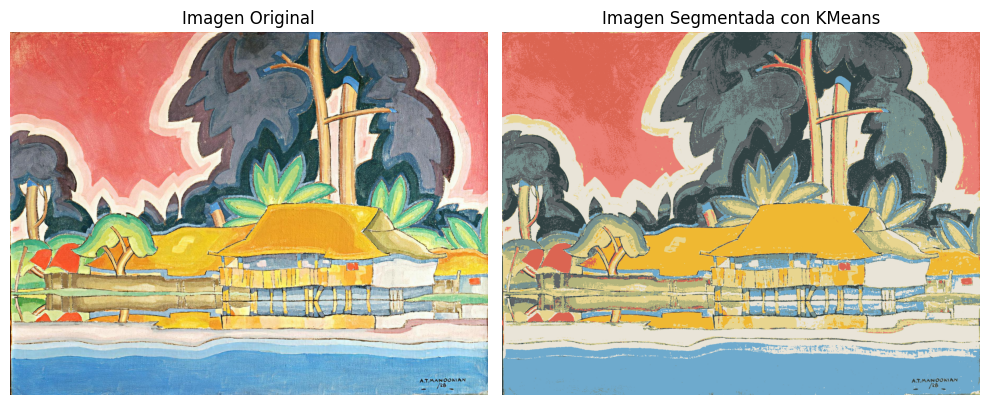

In [99]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(img_original[imagen_prueba])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Segmentada con KMeans')
plt.imshow(img_segmented.astype(np.uint8))
plt.axis('off')

plt.tight_layout()
plt.show()